In [1]:
import keras
from keras.models import Model,Sequential
from keras.layers import Lambda, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GaussianNoise, Input, Dropout, concatenate
from keras import optimizers
from keras.preprocessing.image import img_to_array
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import keras.backend as K
from keras.backend import tf as ktf
from keras import backend as K
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import *
mnist = tf.keras.datasets.mnist

Using TensorFlow backend.


In [18]:
model = keras.models.Sequential([
  keras.layers.Conv2D(filters = 32, kernel_size=(7,7), padding='Same', activation = 'relu', input_shape = (28,28,1)),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)),
  keras.layers.Flatten(),
#   tf.keras.layers.Dropout(0.5),
 keras.layers.Dense(1024, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.5),
  keras.layers.Dense(96, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# summarize history for accuracy
model.summary()
weight_dir = "../q1/q1_2_1/mnist/"
model.load_weights(weight_dir + "mnist_1.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
dense_6 (Dense)              (None, 96)                98400     
Total params: 6,523,680
Trainable params: 6,523,616
Non-trainable params: 64
_________________________________________________________________

ValueError: Dimension 1 in both shapes must be equal, but are 96 and 10. Shapes are [1024,96] and [1024,10]. for 'Assign_9' (op: 'Assign') with input shapes: [1024,96], [1024,10].

In [19]:
(xtrain,ytrain),(x_test, y_test) = mnist.load_data()
x_test=x_test[0:6]
y_test=y_test[0:6]
x_test=x_test//255.0
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [20]:
layer_output=model.layers[1].output
activation_model = Model(inputs=model.input, outputs=layer_output)
a = activation_model.predict(x_test)


In [21]:
a.shape

(6, 28, 28, 32)

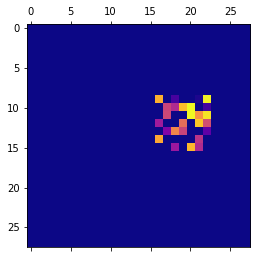

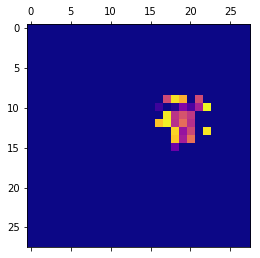

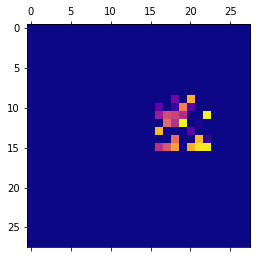

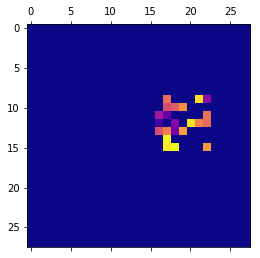

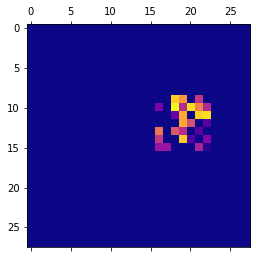

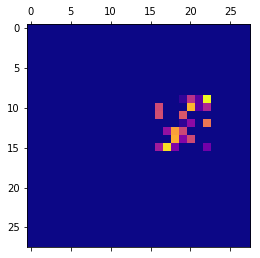

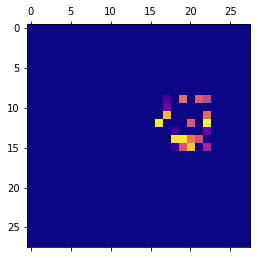

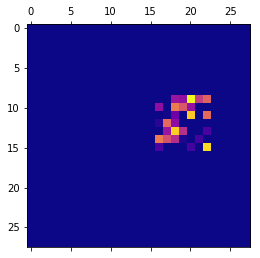

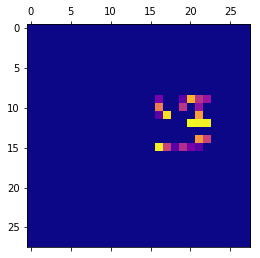

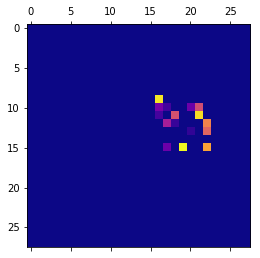

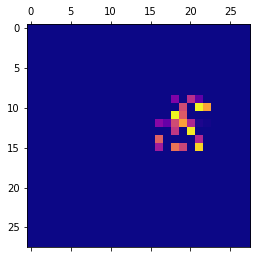

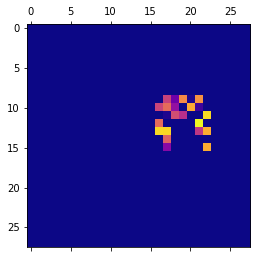

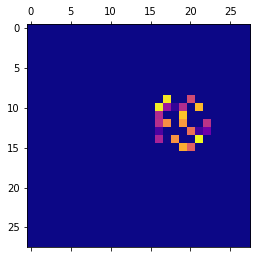

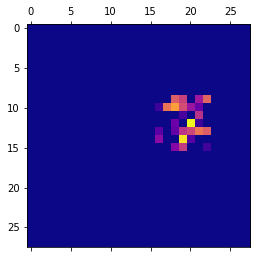

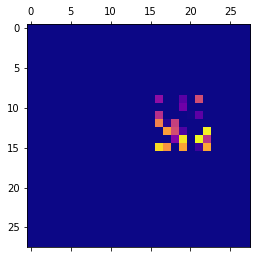

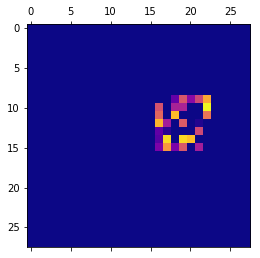

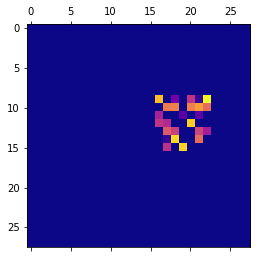

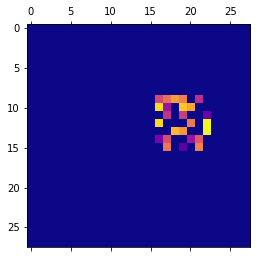

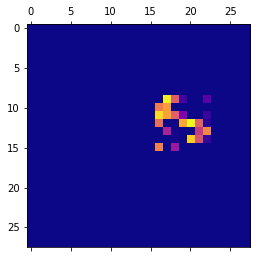

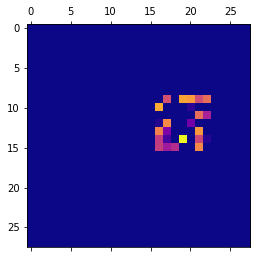

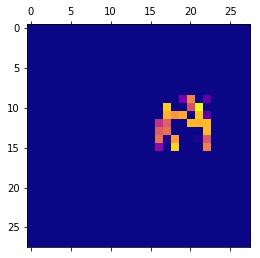

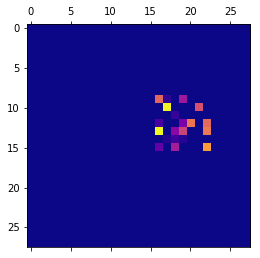

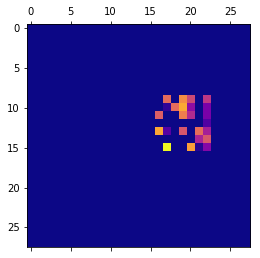

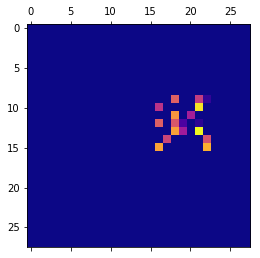

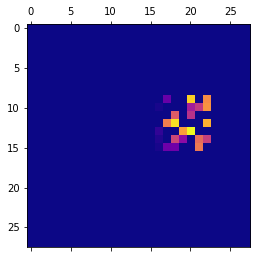

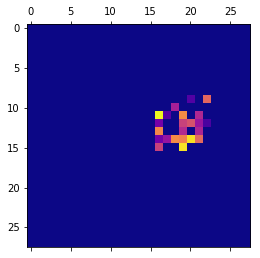

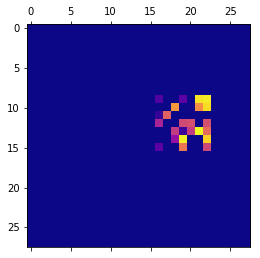

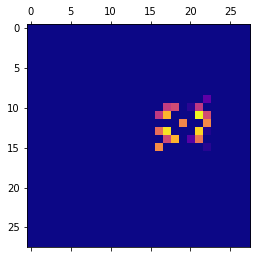

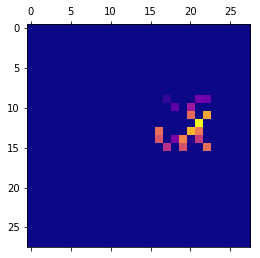

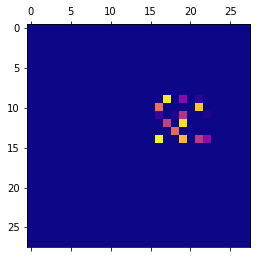

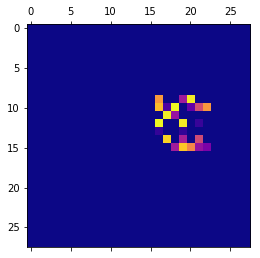

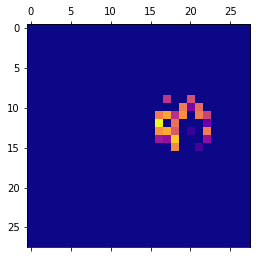

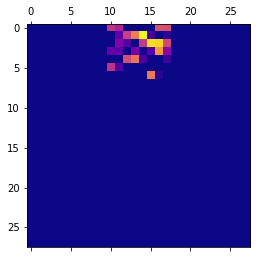

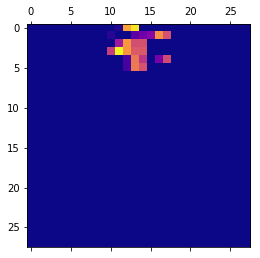

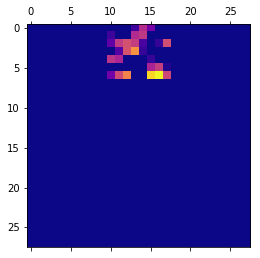

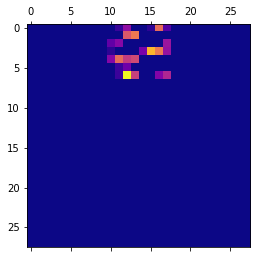

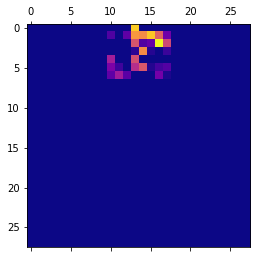

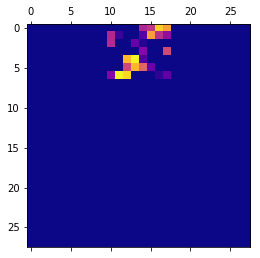

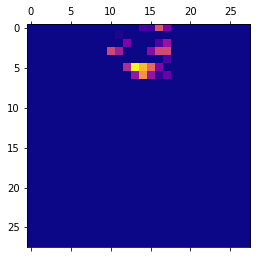

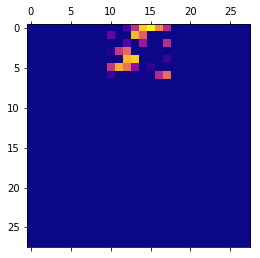

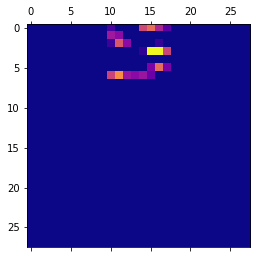

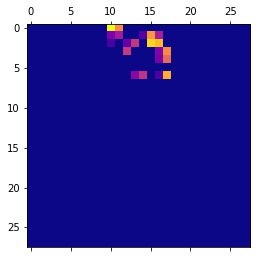

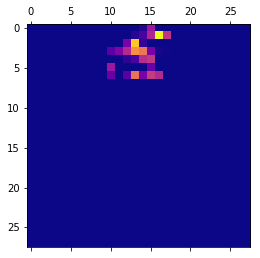

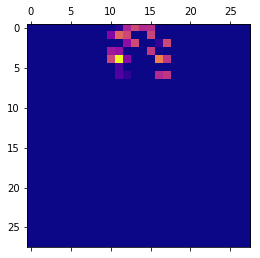

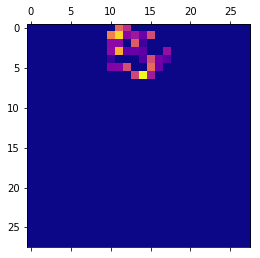

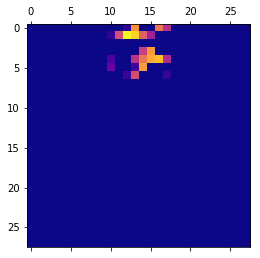

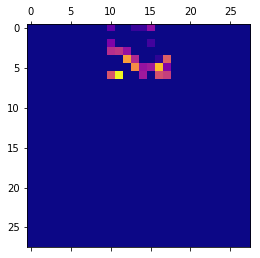

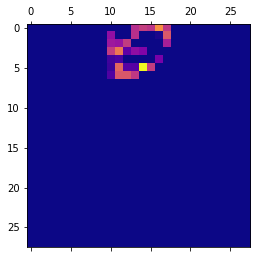

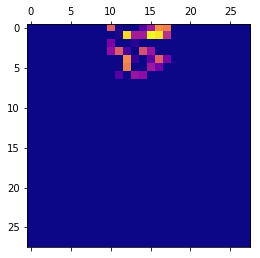

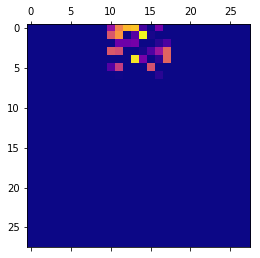

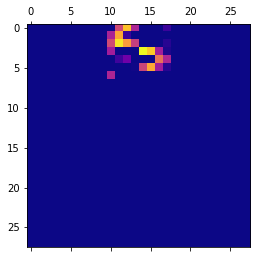

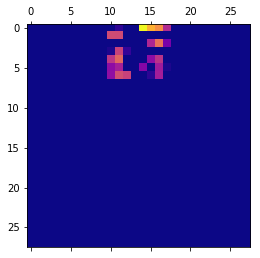

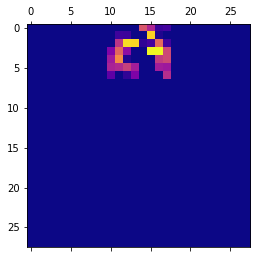

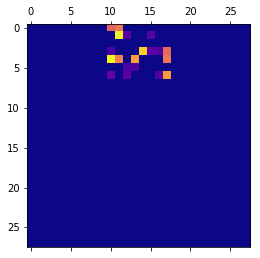

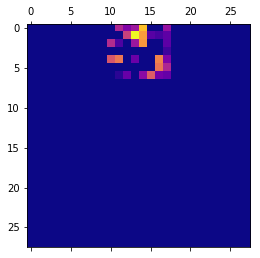

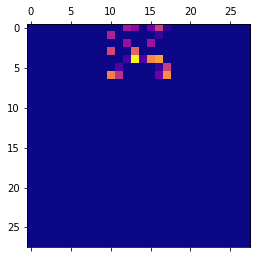

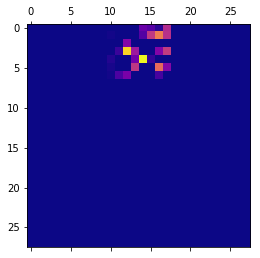

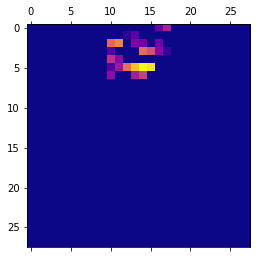

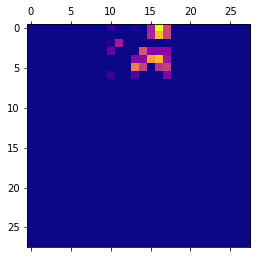

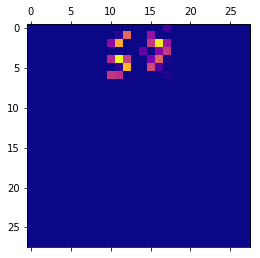

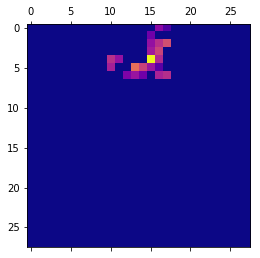

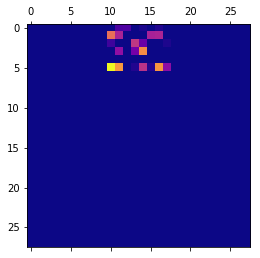

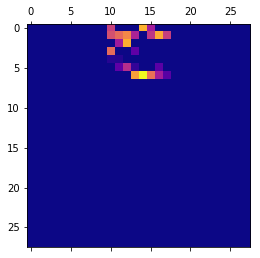

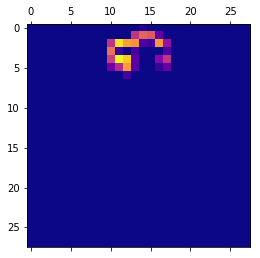

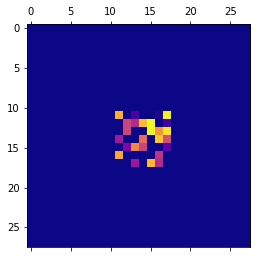

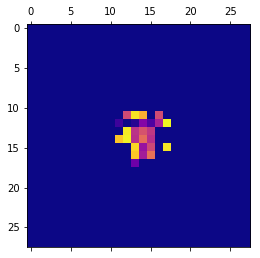

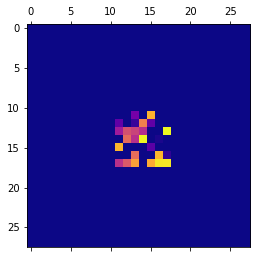

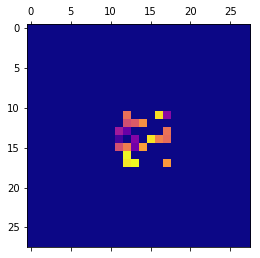

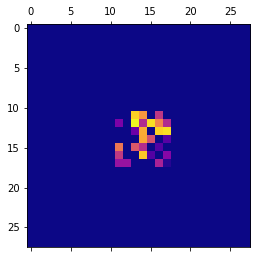

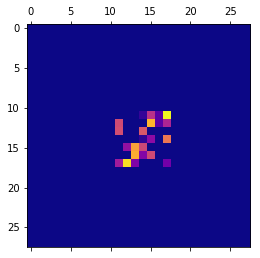

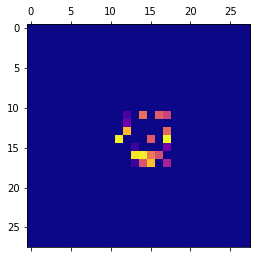

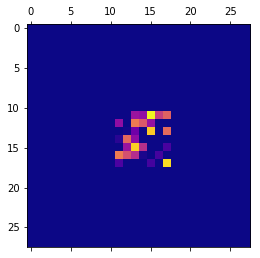

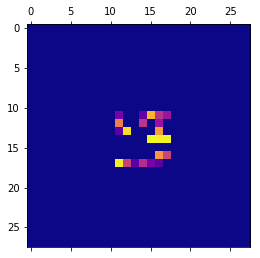

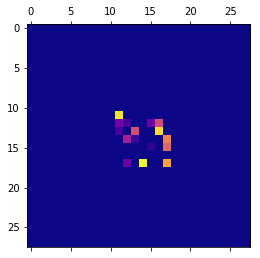

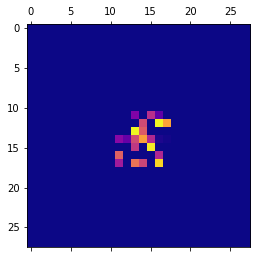

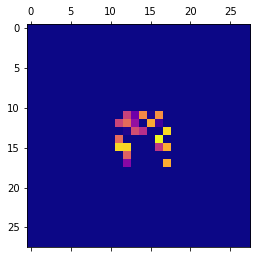

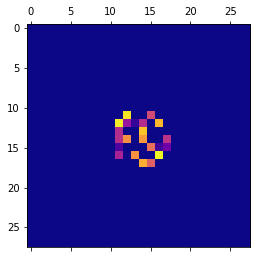

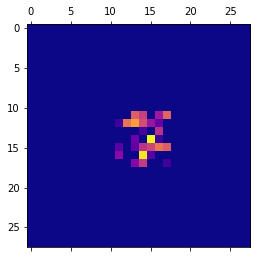

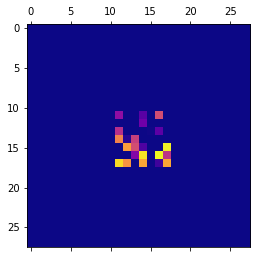

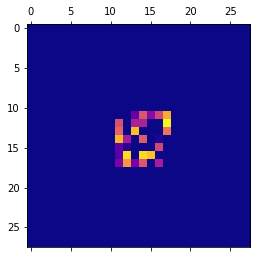

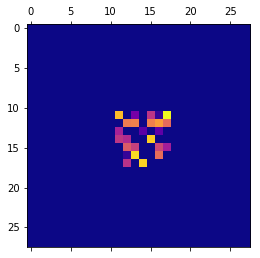

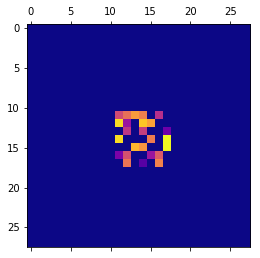

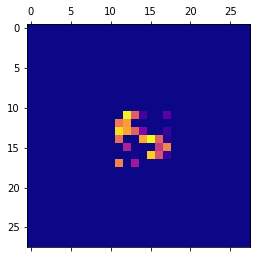

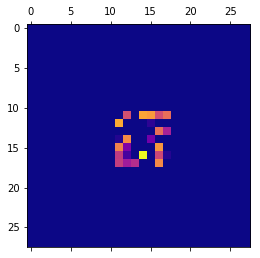

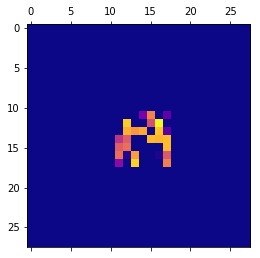

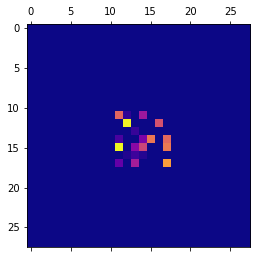

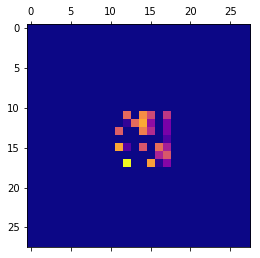

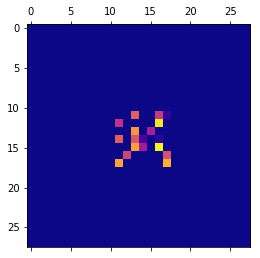

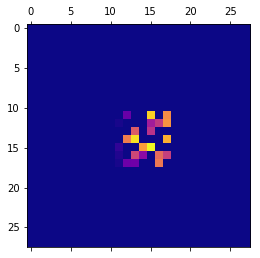

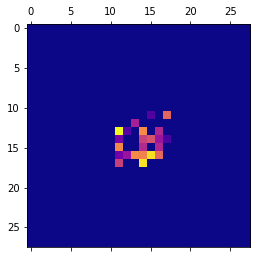

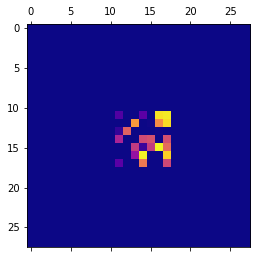

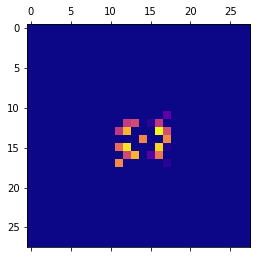

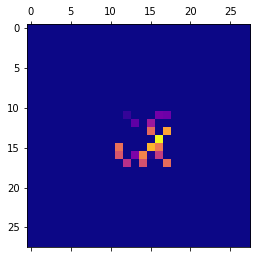

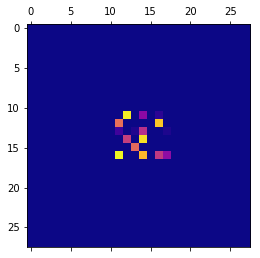

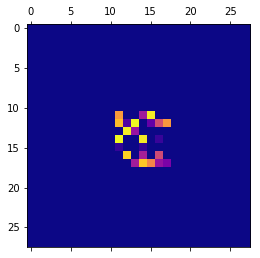

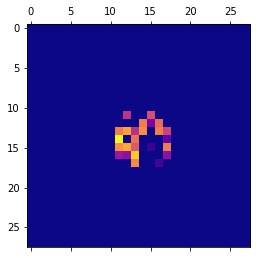

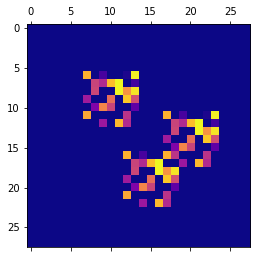

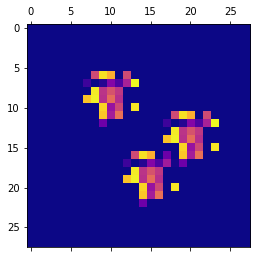

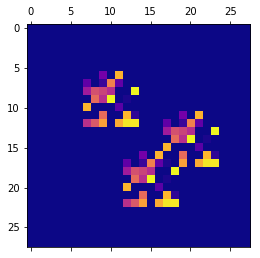

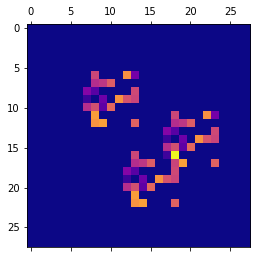

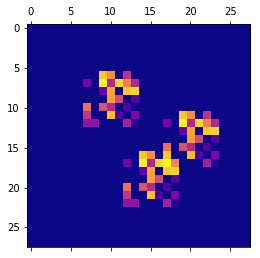

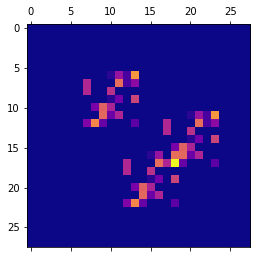

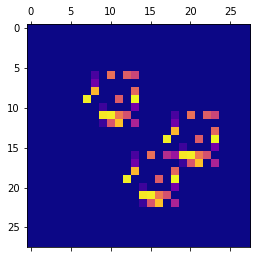

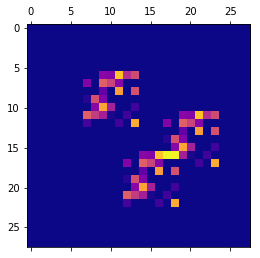

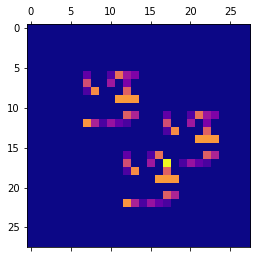

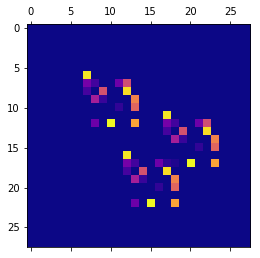

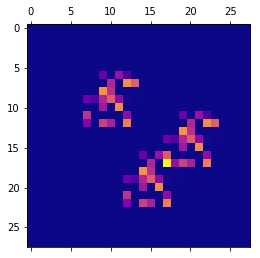

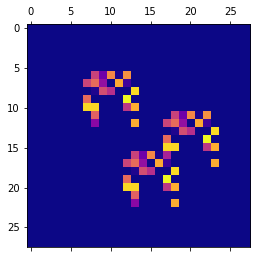

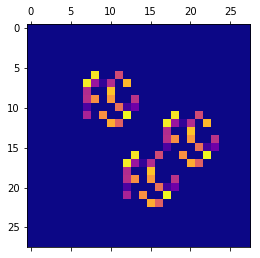

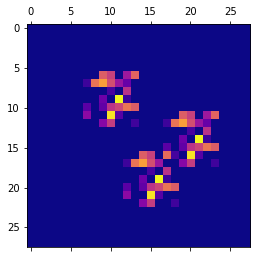

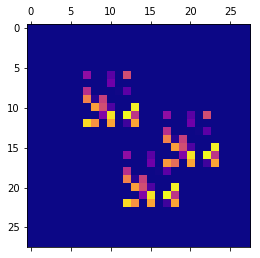

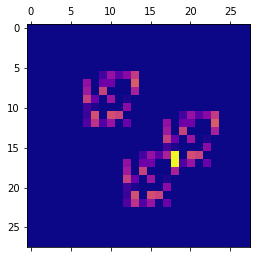

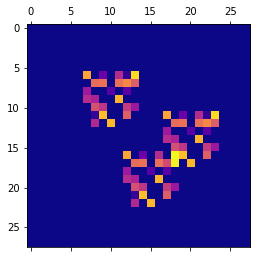

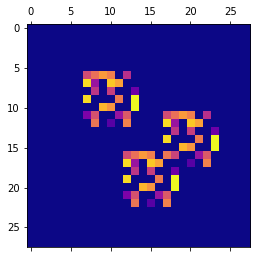

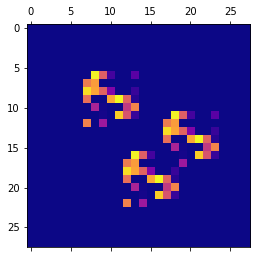

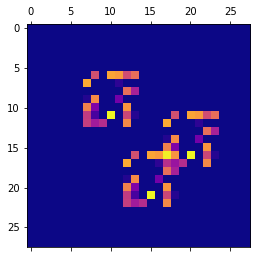

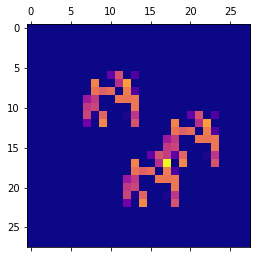

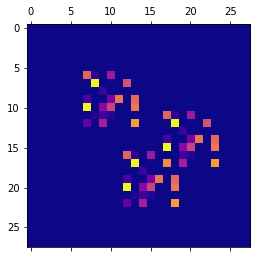

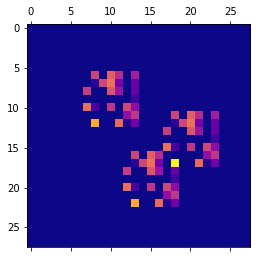

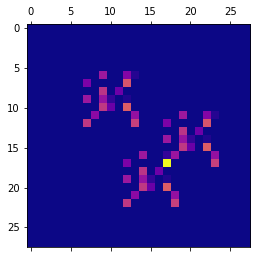

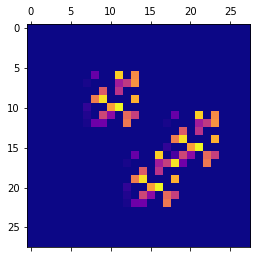

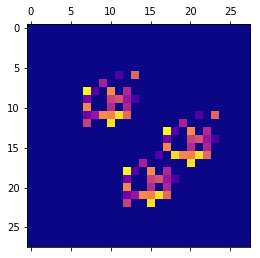

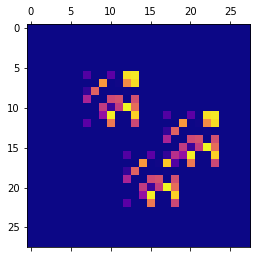

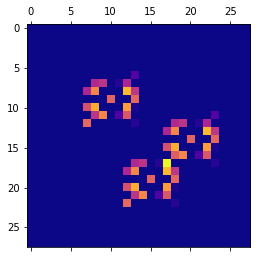

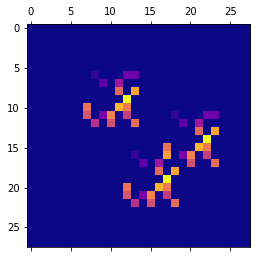

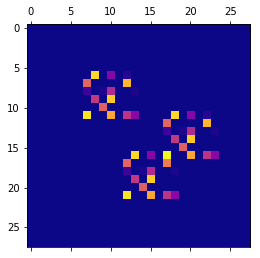

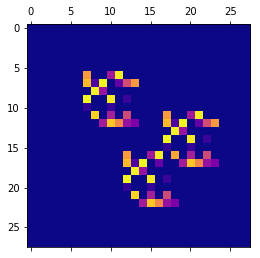

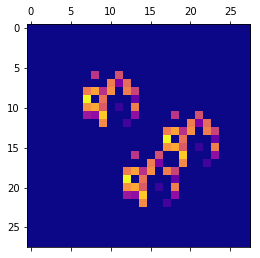

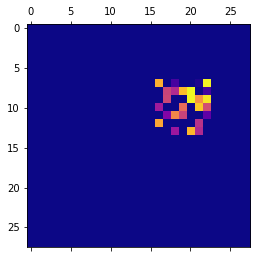

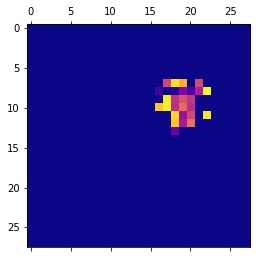

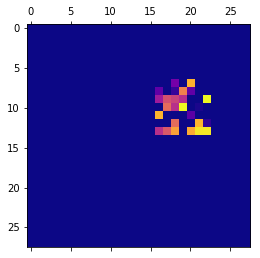

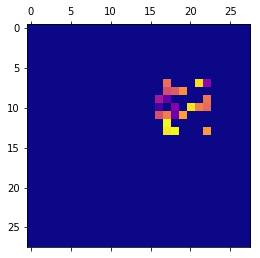

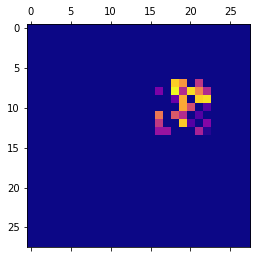

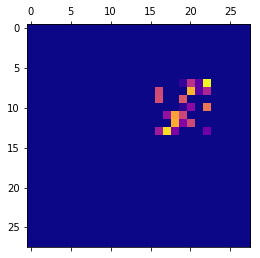

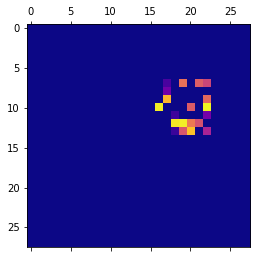

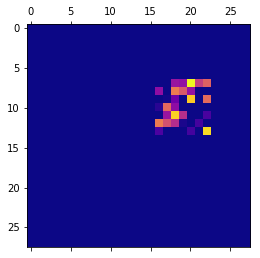

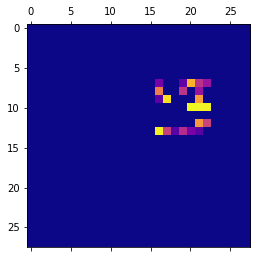

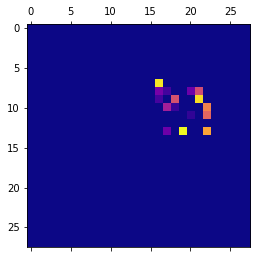

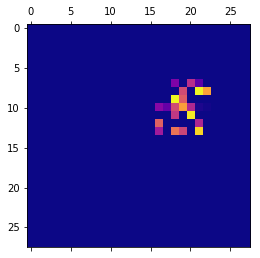

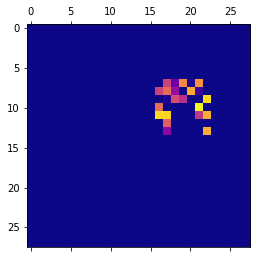

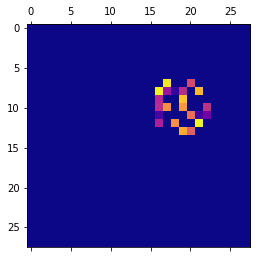

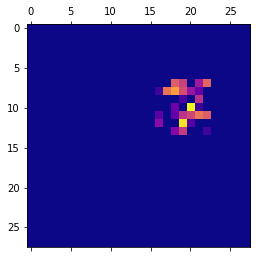

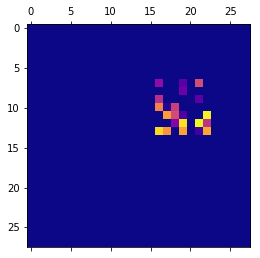

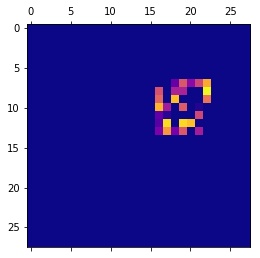

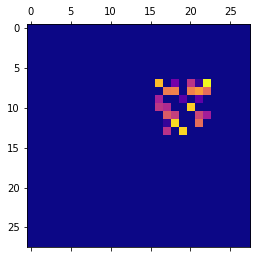

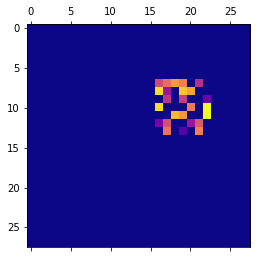

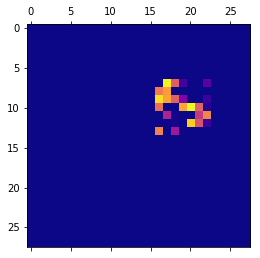

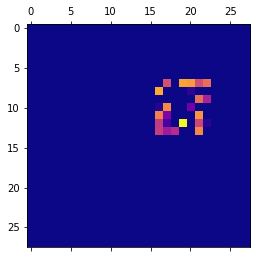

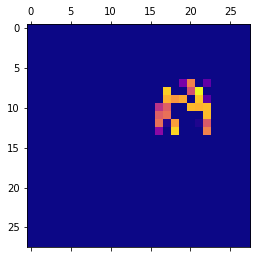

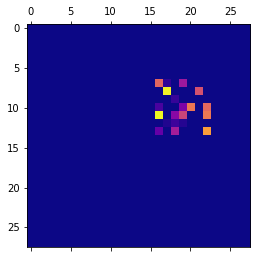

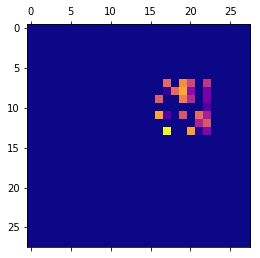

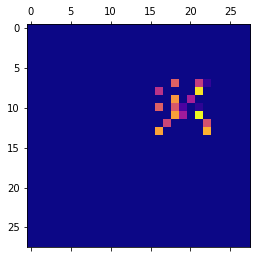

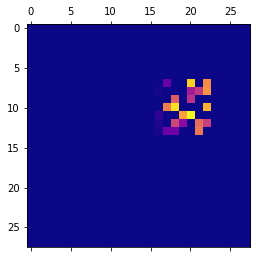

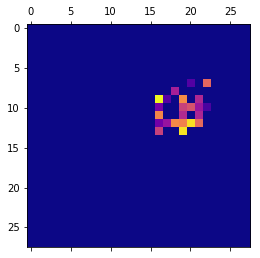

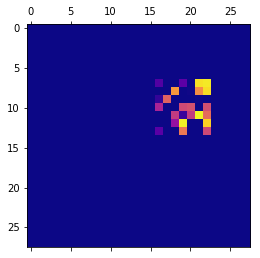

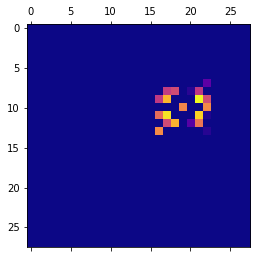

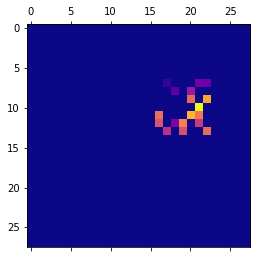

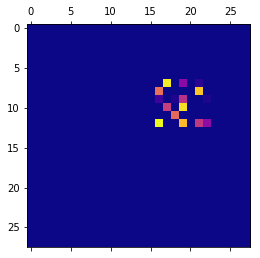

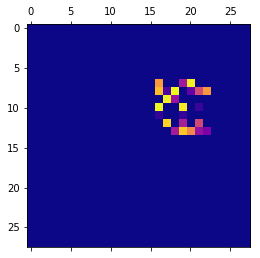

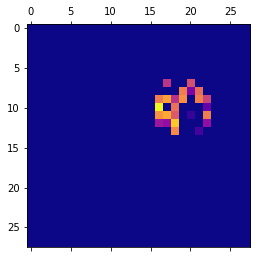

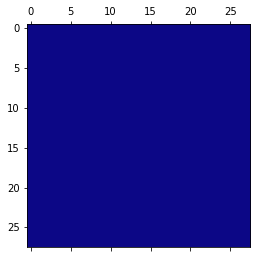

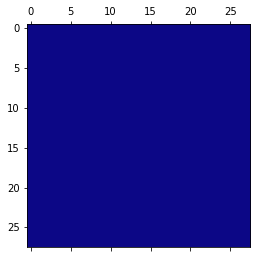

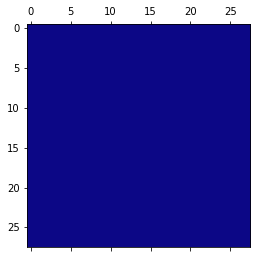

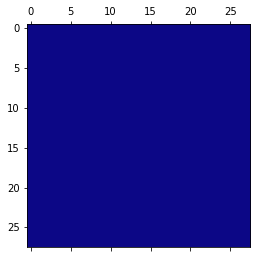

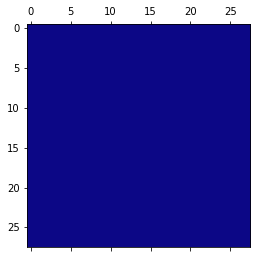

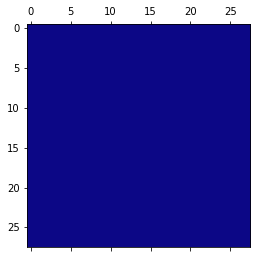

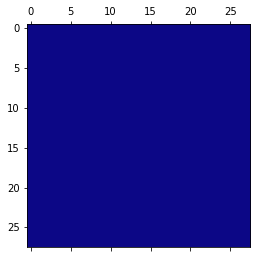

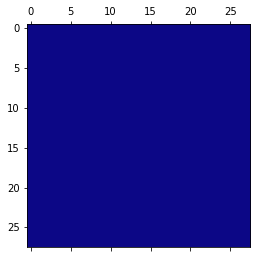

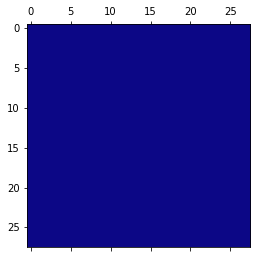

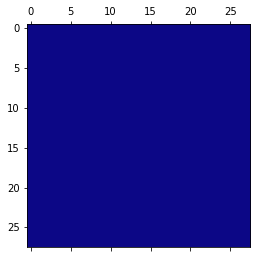

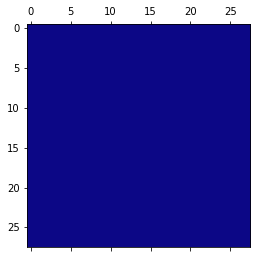

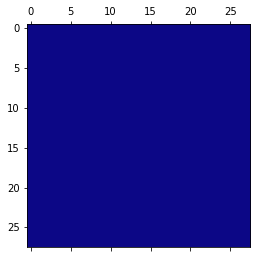

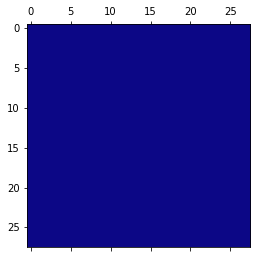

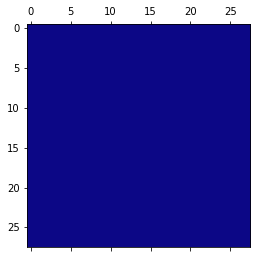

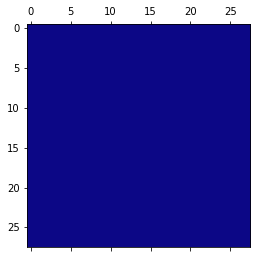

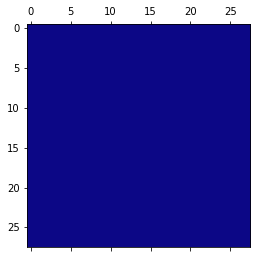

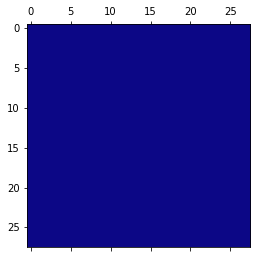

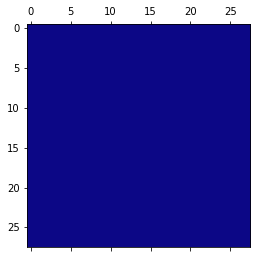

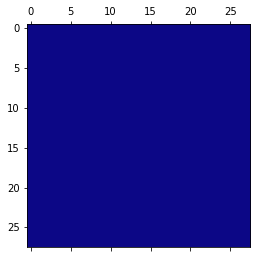

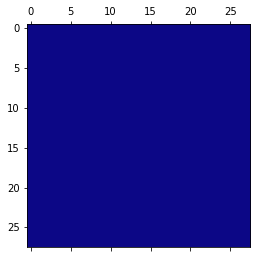

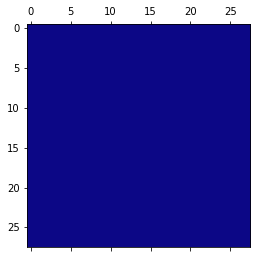

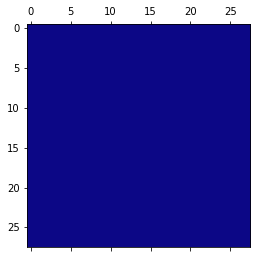

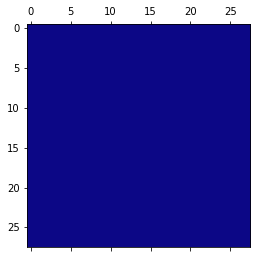

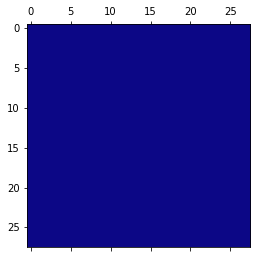

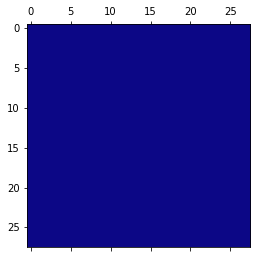

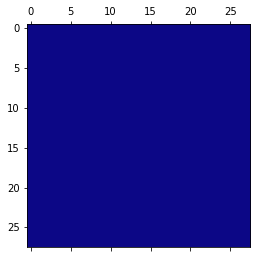

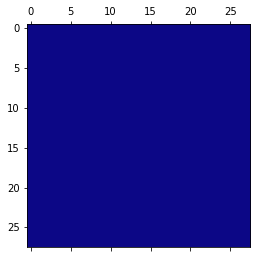

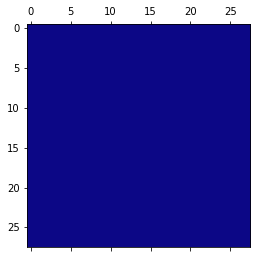

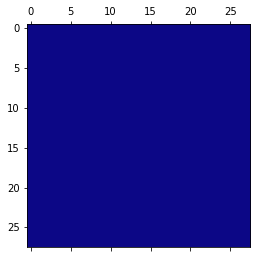

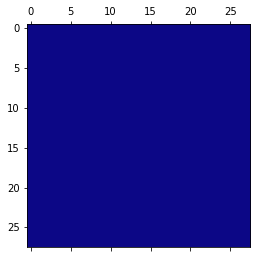

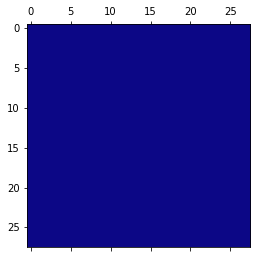

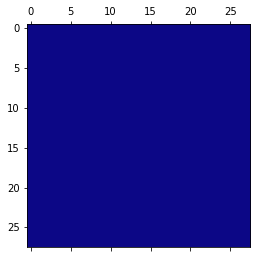

In [22]:
di = "activations_mnist_1/"
for j in range(a.shape[0]):
    for k in range(a.shape[-1]):
        plt.matshow(a[j,:,:,k],cmap='plasma')
        plt.savefig(di+ str(j)+"_"+str(k)+".png")
        plt.show()

In [24]:
weight , biases = model.get_layer('conv2d_3').get_weights()

In [25]:
weight.shape

(7, 7, 1, 32)

In [26]:
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

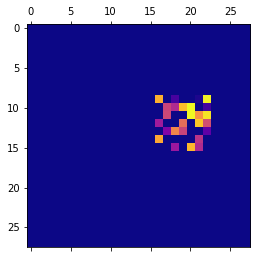

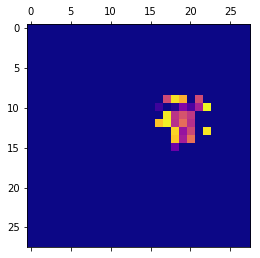

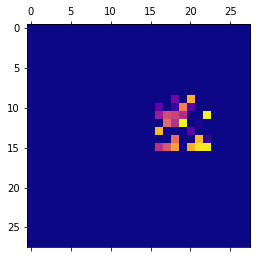

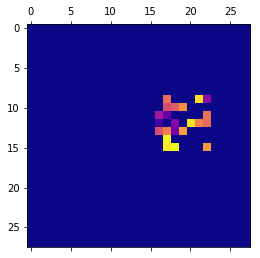

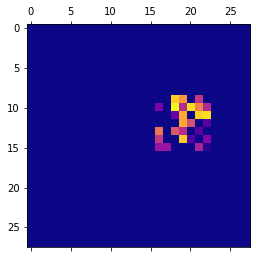

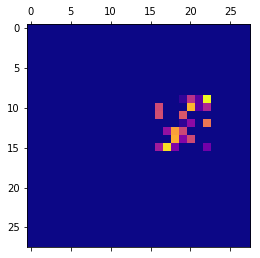

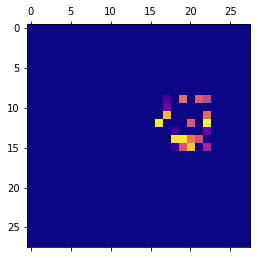

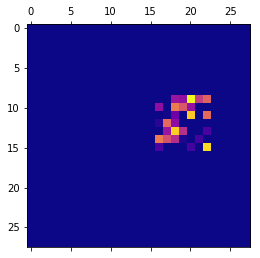

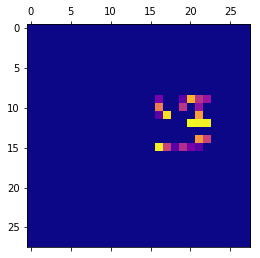

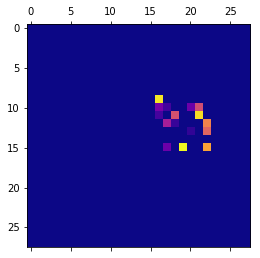

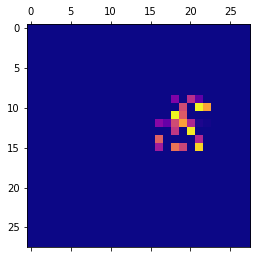

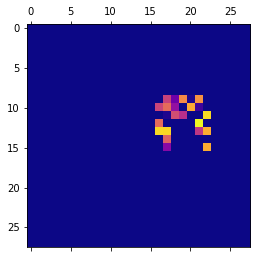

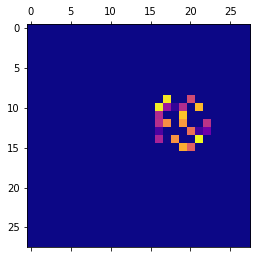

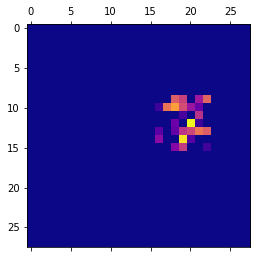

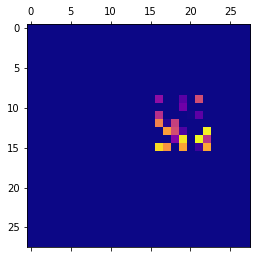

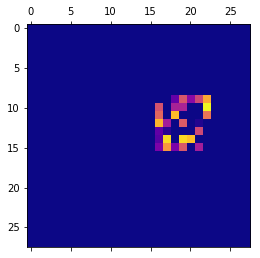

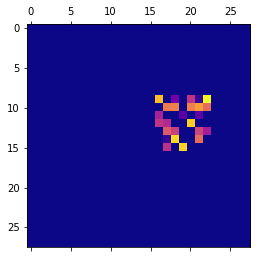

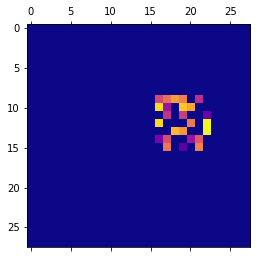

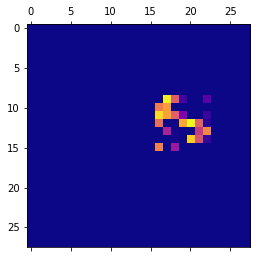

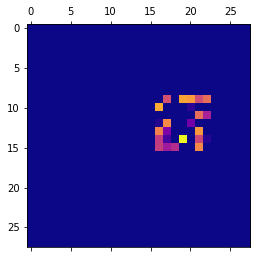

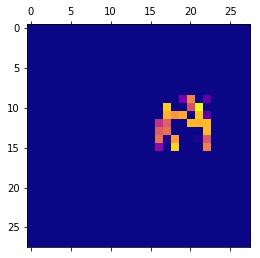

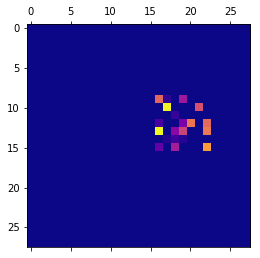

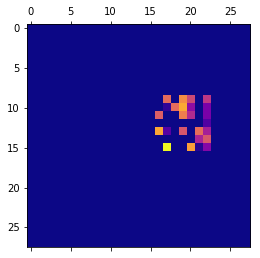

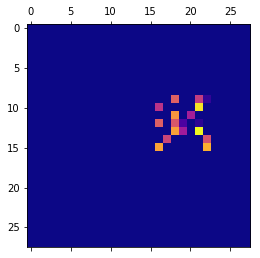

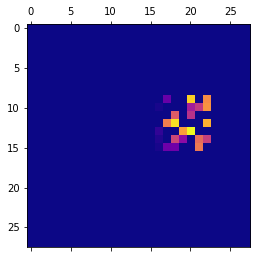

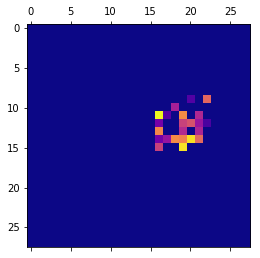

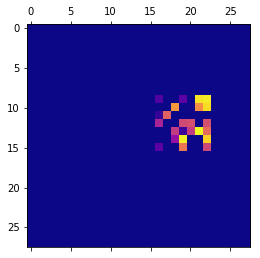

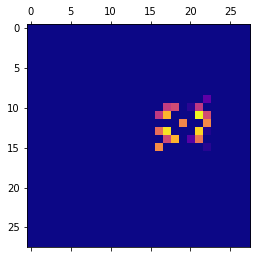

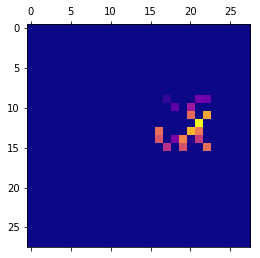

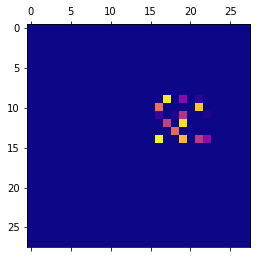

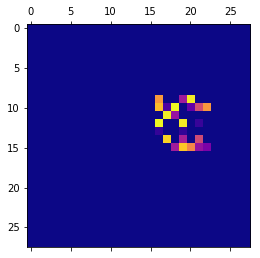

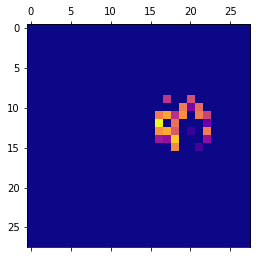

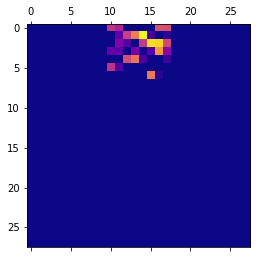

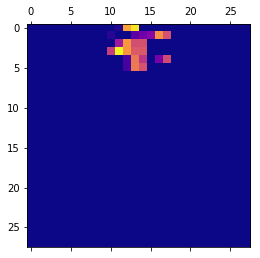

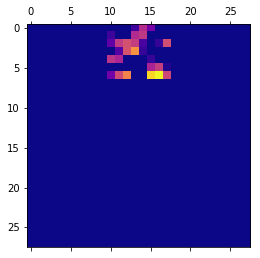

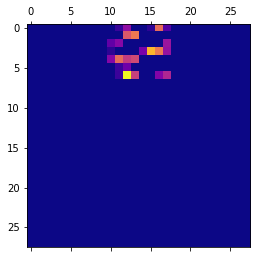

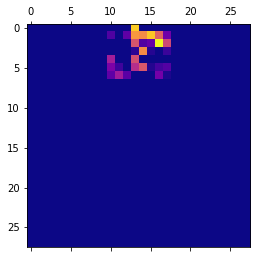

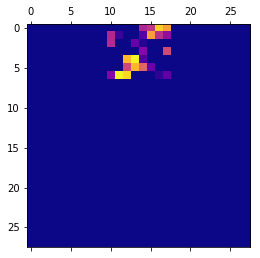

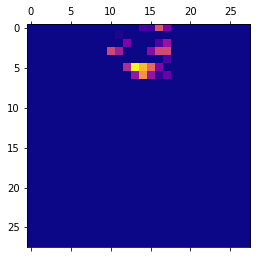

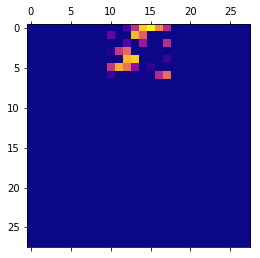

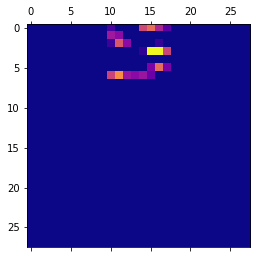

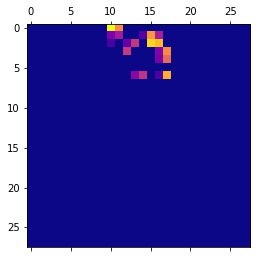

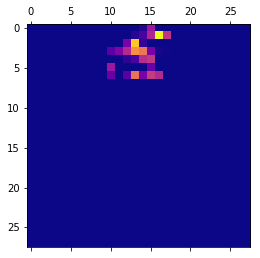

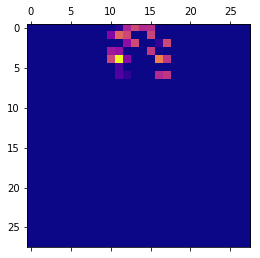

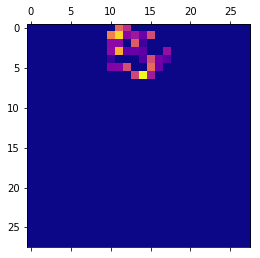

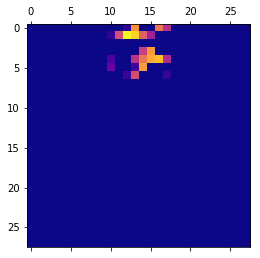

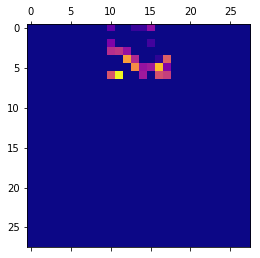

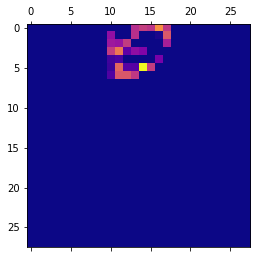

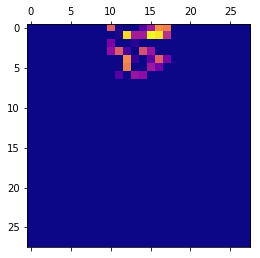

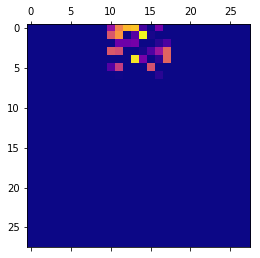

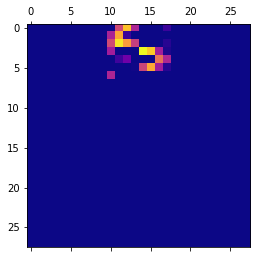

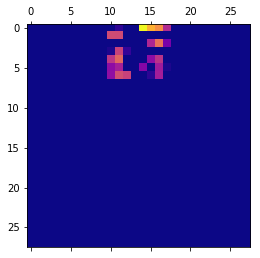

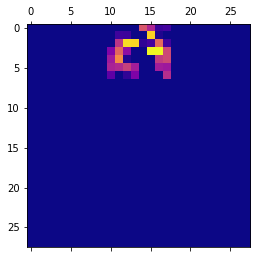

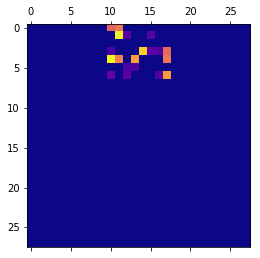

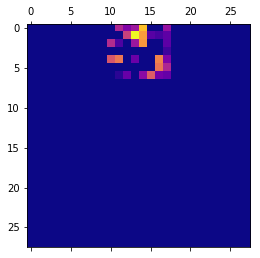

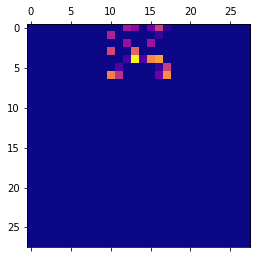

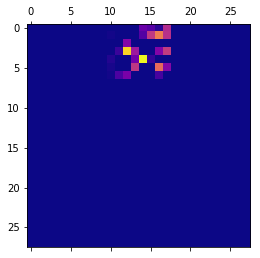

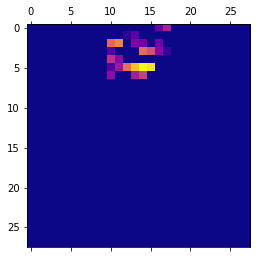

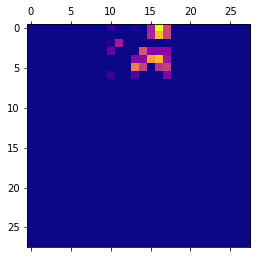

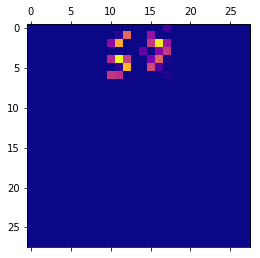

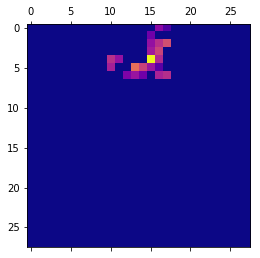

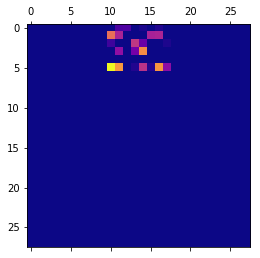

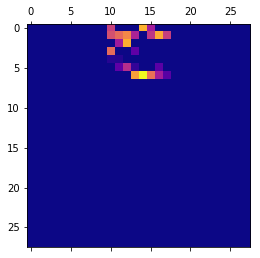

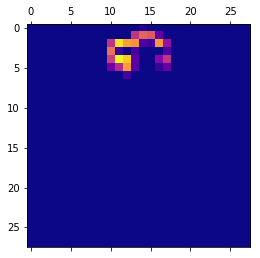

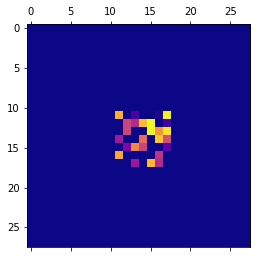

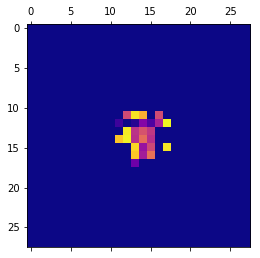

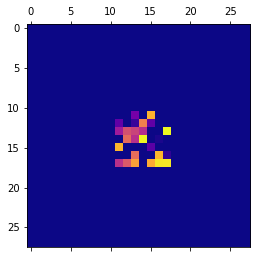

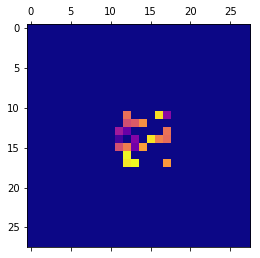

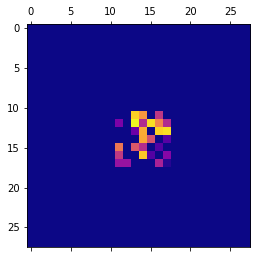

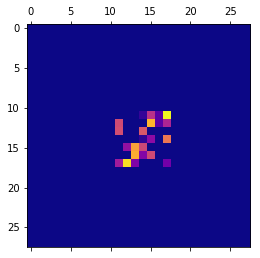

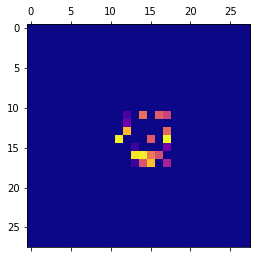

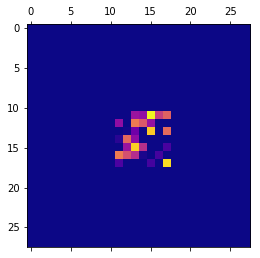

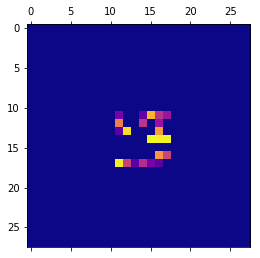

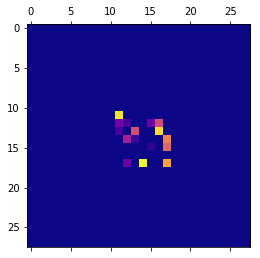

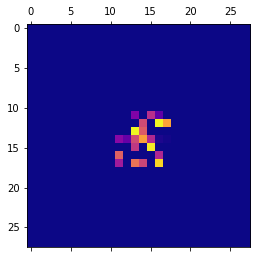

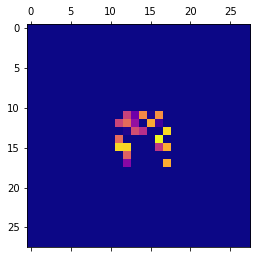

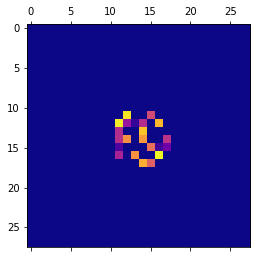

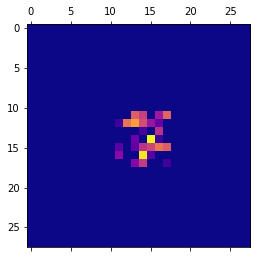

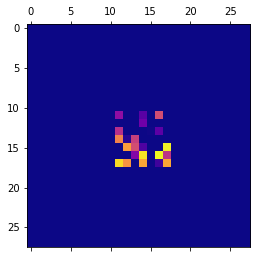

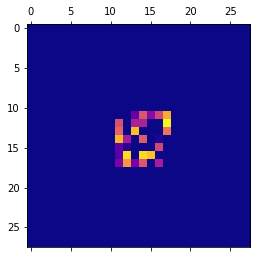

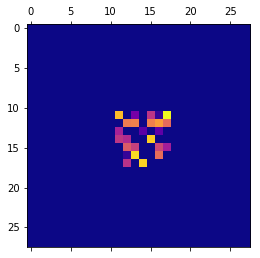

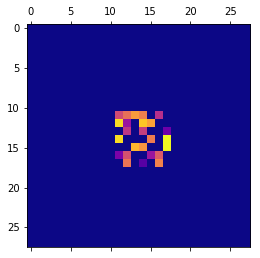

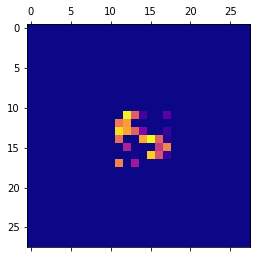

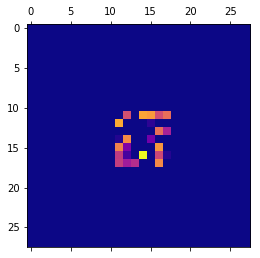

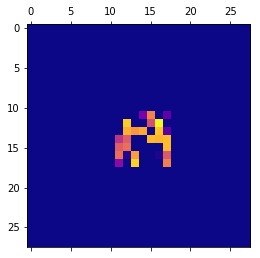

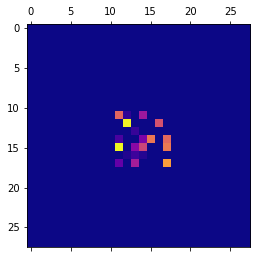

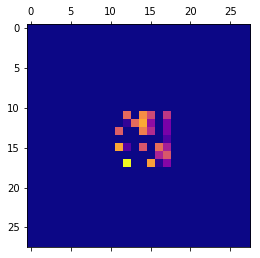

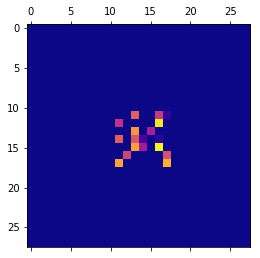

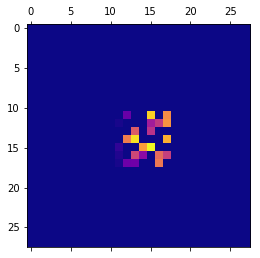

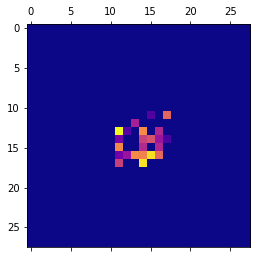

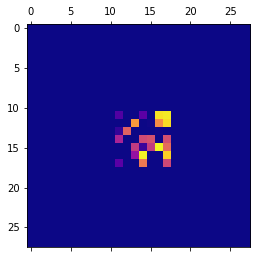

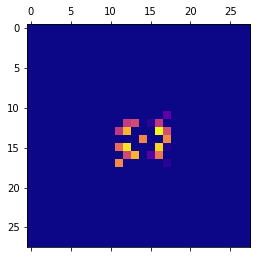

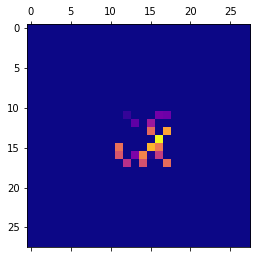

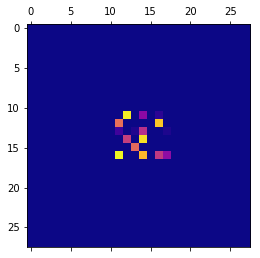

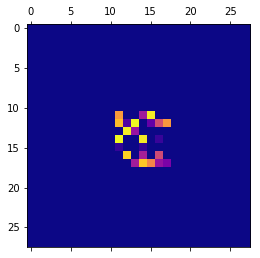

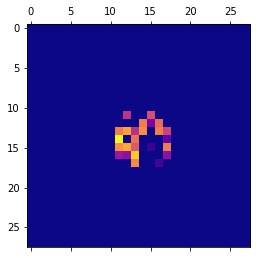

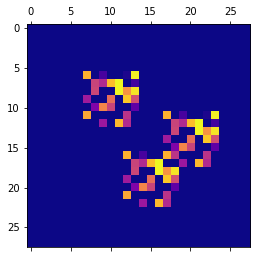

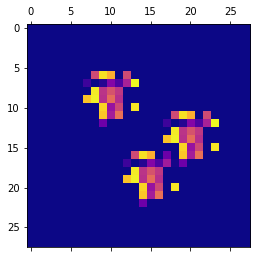

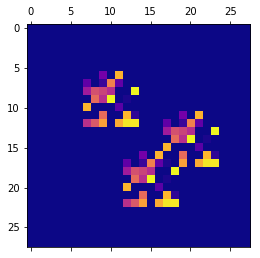

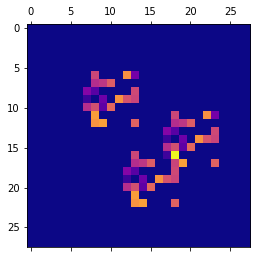

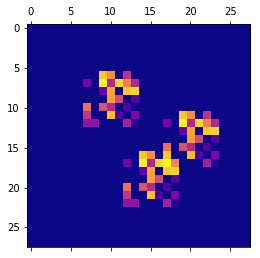

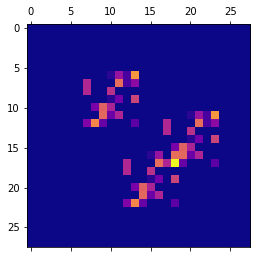

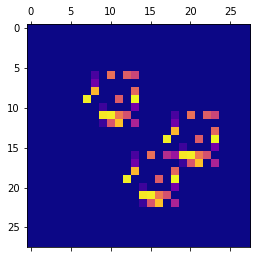

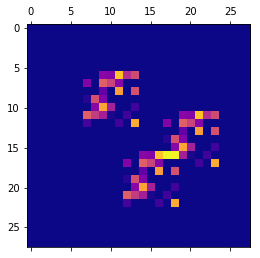

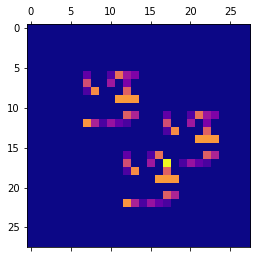

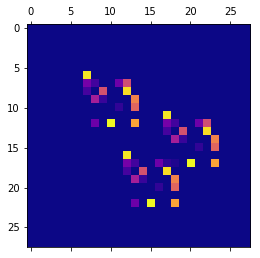

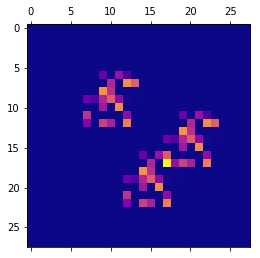

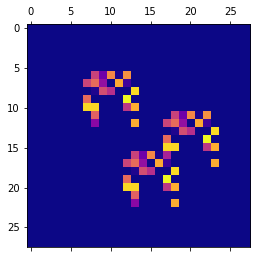

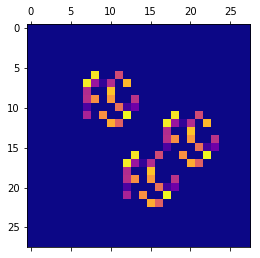

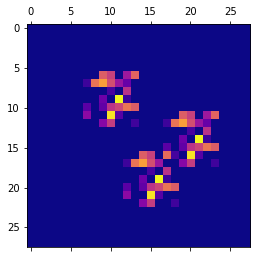

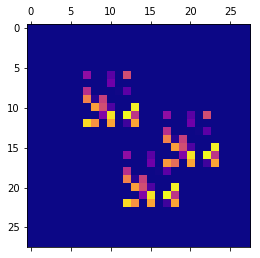

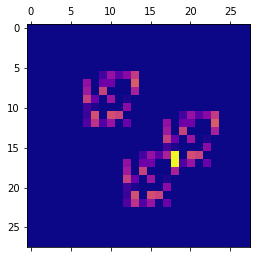

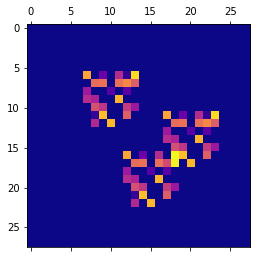

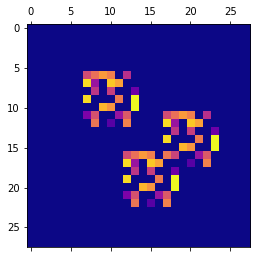

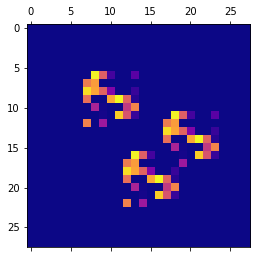

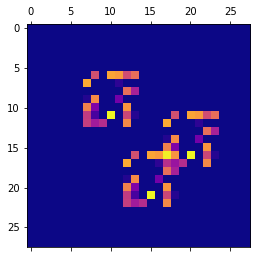

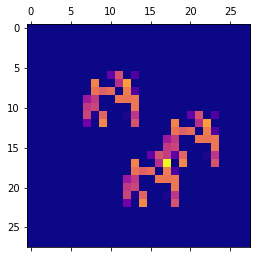

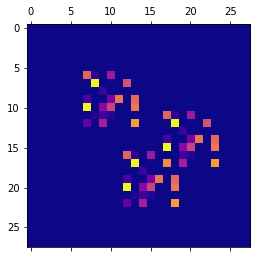

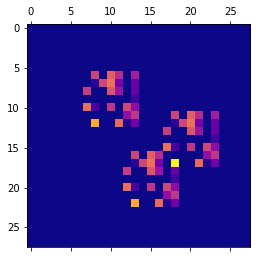

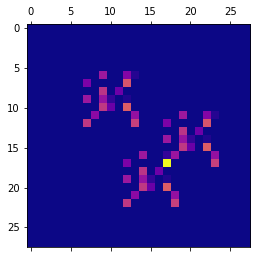

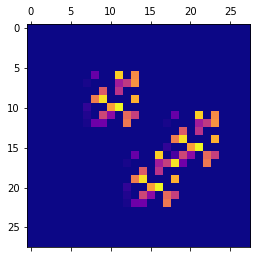

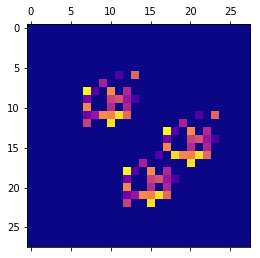

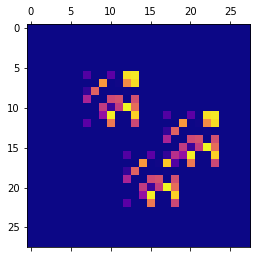

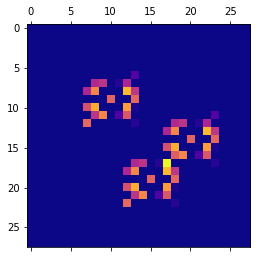

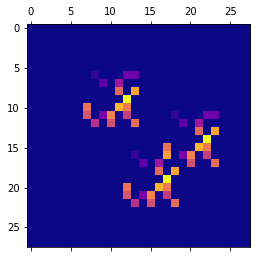

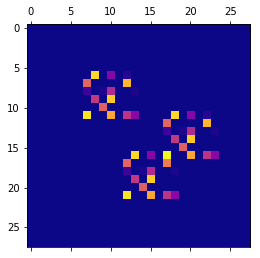

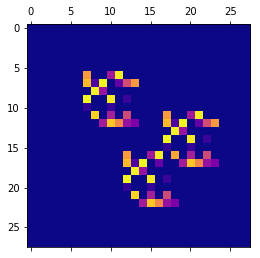

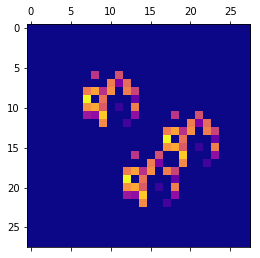

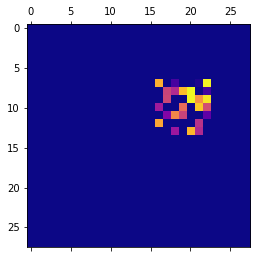

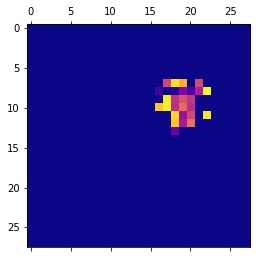

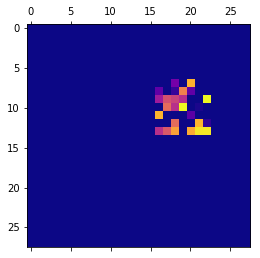

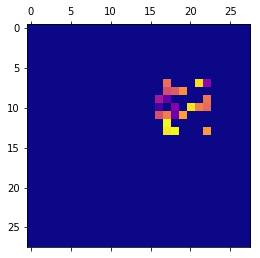

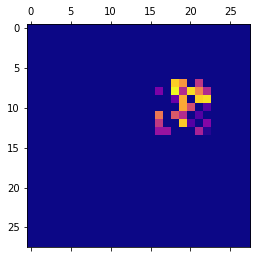

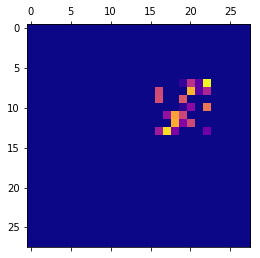

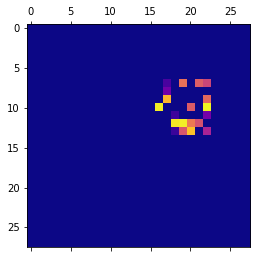

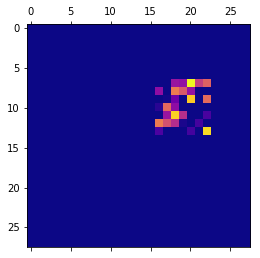

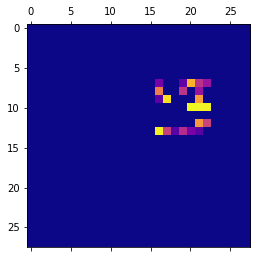

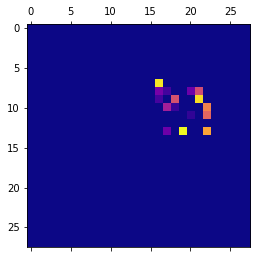

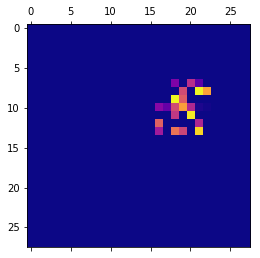

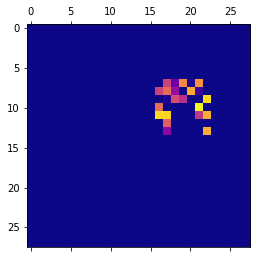

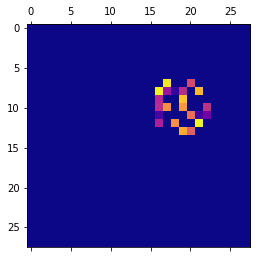

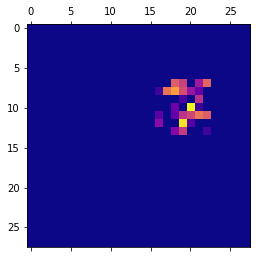

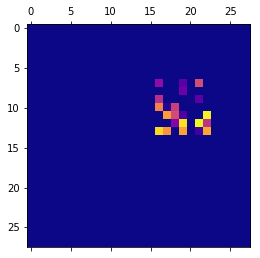

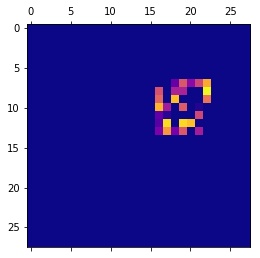

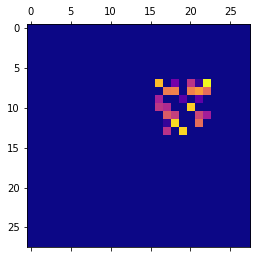

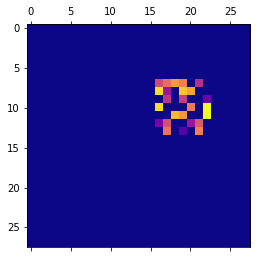

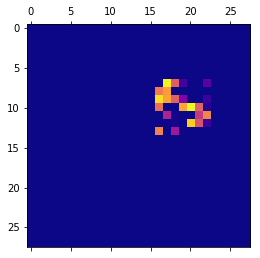

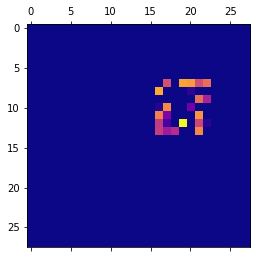

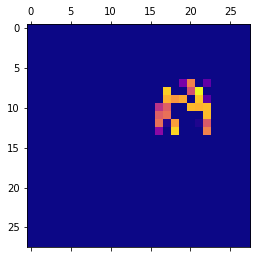

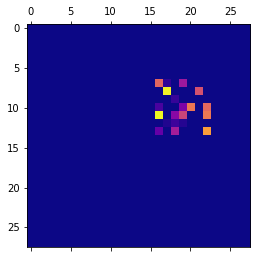

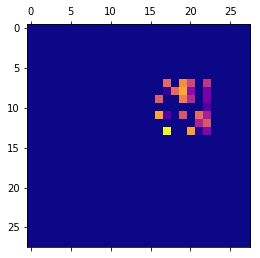

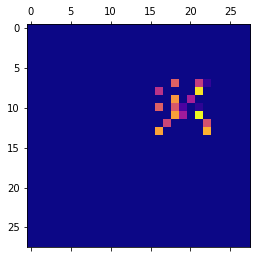

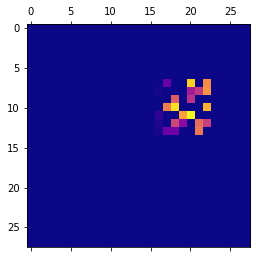

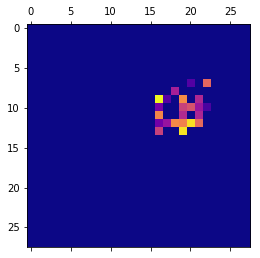

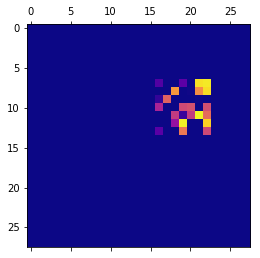

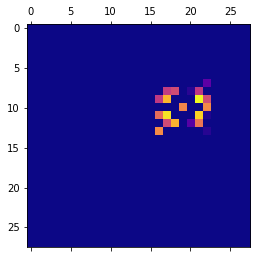

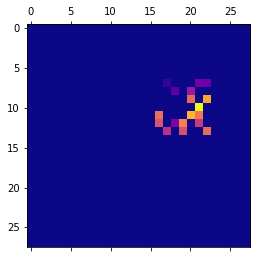

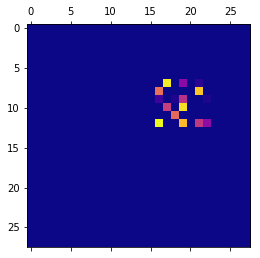

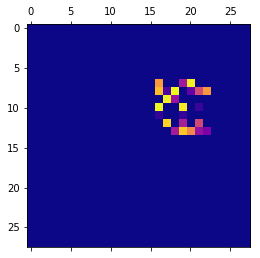

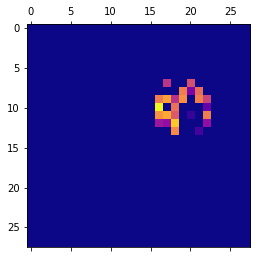

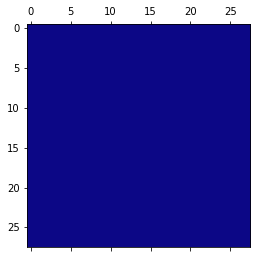

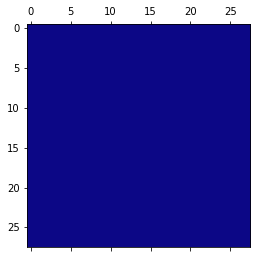

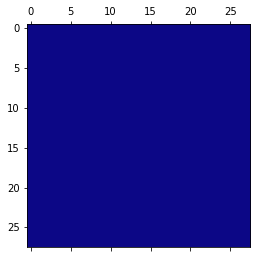

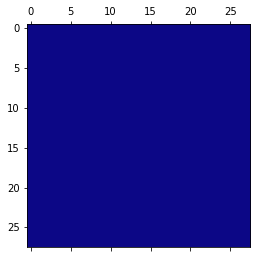

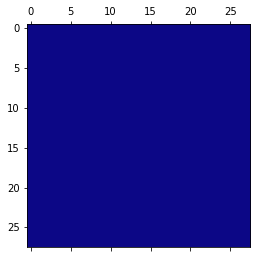

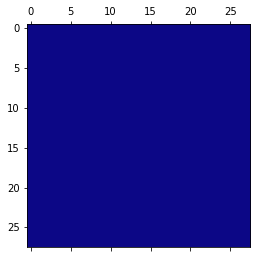

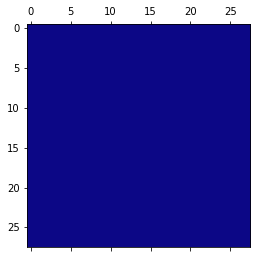

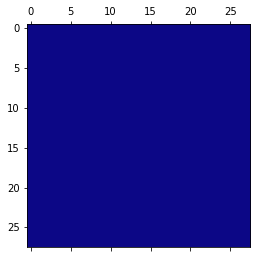

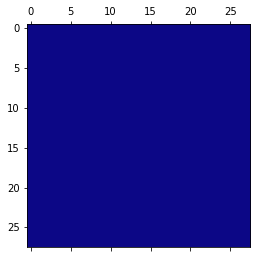

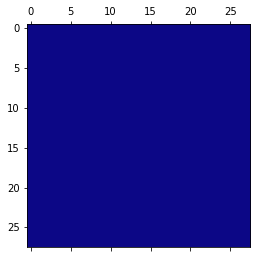

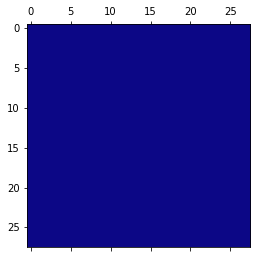

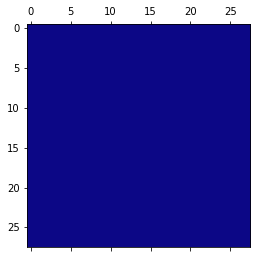

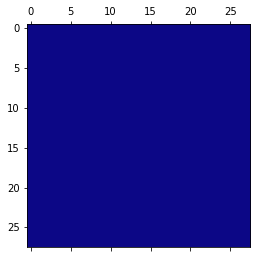

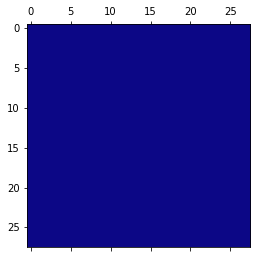

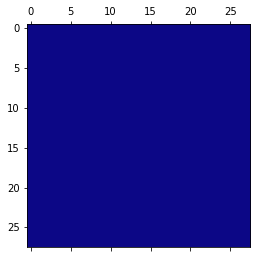

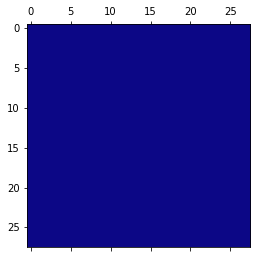

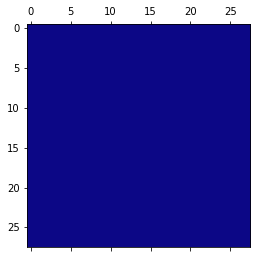

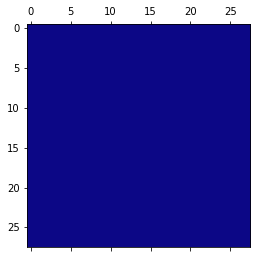

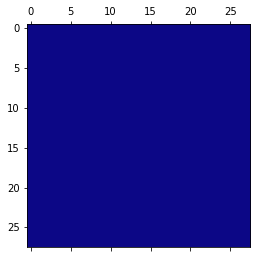

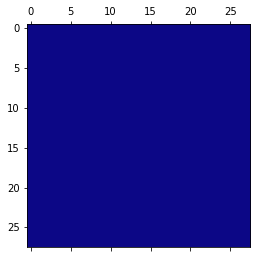

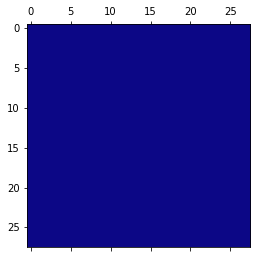

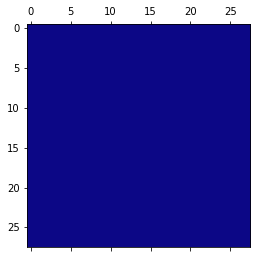

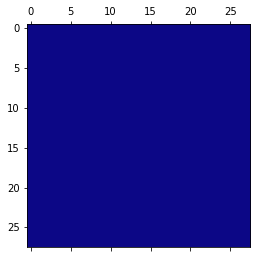

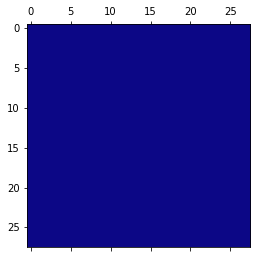

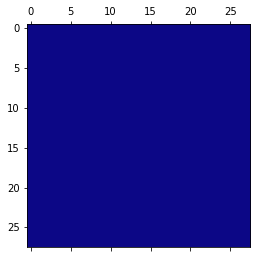

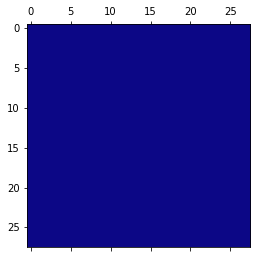

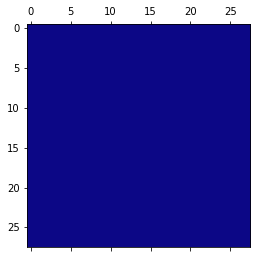

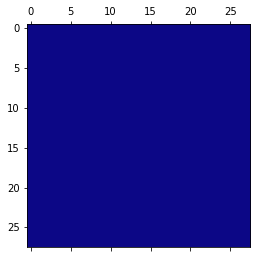

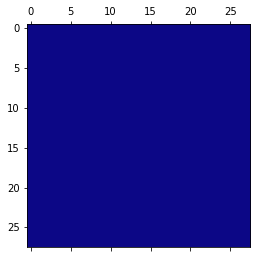

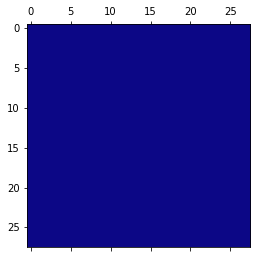

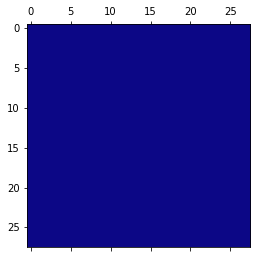

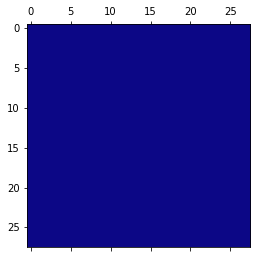

In [27]:
di_filter = "filters_mnist_1/"
for j in range(a.shape[0]):
    for k in range(a.shape[-1]):
        plt.matshow(a[j,:,:,k],cmap='plasma')
        plt.savefig(di_filter+ str(j)+"_"+str(k)+".png")
        plt.show()